In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common import results_plotter
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

import sys
# direc = os.path.dirname(__file__)
# pri&
# caution: path[0] is reserved for script path (or '' in REPL)
# print(str(path)+'/ppo')
sys.path.insert(1, '/Users/faridounet/PhD/TransportersDilemma')
from a_star import A_Star
from SA_baseline import recuit
from greedy_baseline import baseline
from assignment import RemoveActionEnv, AssignmentEnv, GameEnv
import pickle
from shortcut import multi_types
import numpy as np
import matplotlib.pyplot as plt
import collections

from shortcut import multi_types
from GameLearning import LRI, GameLearning, EXP3
from SA_baseline import recuit
from a_star import A_Star
from greedy_baseline import baseline, greedy

np.random.seed(42)

pygame 2.5.2 (SDL 2.28.3, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
K = 100
with open(f'RL/game_K{K}.pkl', 'rb') as f:
    g = pickle.load(f)
routes = np.load(f'RL/routes_K{K}.npy')
dests = np.load(f'RL/destinations_K{K}.npy')

with open(f'res_compare_EG_A*_SA_K{K}_n100.pkl', 'rb') as f:
    data = pickle.load(f)
    
if K == 100:
    g.Q = 40

In [3]:
# On recalcule les rewards
rewards = []
for k in data.keys():
    rs = np.zeros(len(data[k]))
    for i in data[k].keys():
        sol = data[k][i]['sol']
        env = RemoveActionEnv(game = g, saved_routes = routes, saved_dests=dests, 
                      obs_mode='elimination_gain', 
                      action_mode = 'destinations',
                        change_instance = True, rewards_mode='normalized_terminal', instance_id = int(i))
        env.reset()
        _, r, *_ = env.step(sol)
        if r == 0:
            print(k)
            print(i)
            print(sol)
        rs[i] = r
    rewards.append(rs)

res_A
10
[ 0  7  8 15 16 17 21 23 24 30 31 39 49 53 62 63 82 89 92 93]


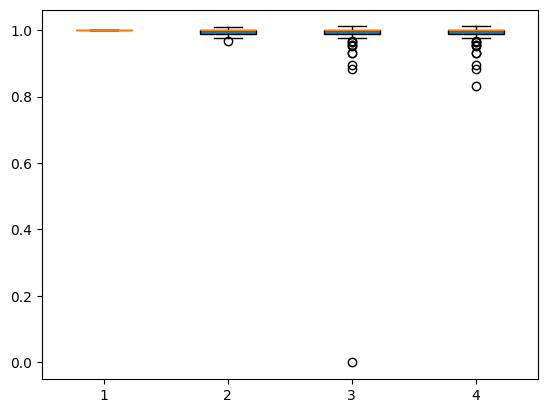

In [4]:
# affichage
rr = []
for rs in rewards:
    rr.append(rs/(rewards[0]))
    
plt.boxplot(
        rr,
        patch_artist=True,
        )
plt.show()

In [6]:
# On regarde ou la DP sous-performe
print(np.where(rr[1]>1))
print(np.where(rr[2]>1))
print(np.where(rr[3]>1))

(array([19, 21, 42, 50, 53, 56, 59, 77, 81]),)
(array([19, 50, 59, 66, 77, 80, 81, 88, 89]),)
(array([19, 50, 59, 66, 77, 80, 81, 88, 89]),)


In [10]:
# On cible une instance
instance = 19

In [12]:
# On reessaye la DP
env = RemoveActionEnv(game = g, saved_routes = routes, saved_dests=dests, 
                      obs_mode='elimination_gain', 
                      action_mode = 'destinations',
                        change_instance = False, rewards_mode='normalized_terminal', instance_id = instance)
_, info = env.reset()
excess = info['excess_emission']

rtes = np.array([
    [
        env._env.initial_routes[m, i] 
        for i in range(0, len(env._env.initial_routes[m]), 2)
    ]
    for m in range(len(env._env.initial_routes))
], dtype=int)


# print(env._env.distance_matrix)
# print(CM)
coeff = env._env._game.emissions_KM
# CM = np.array([
#     env._env.distance_matrix*coeff[i]
#     for i in range(len(coeff))
# ]).copy()
a = multi_types(env._env.distance_matrix, rtes, coeff, excess)


_, r, *_ = env.step(a)
print('la solution calculee à nouveau : ', a)
print('reward obtenue par la solution calculee à nouveau : ', r)

print('la solution calculee dans la sim : ', data['res_DP'][instance]['sol'])
print('reward obtenue par la solution calculee dans la sim : ', rewards[0][instance])


trouve assez de packets avec le camion : 9 17.0
trouve assez de packets avec le camion : 2 7.0
trouve assez de packets avec le camion : 3 7.0
max ommited: [25  9  2  3]
solution de taille 3 [0 0 1 2] valeur 8.0
la solution calculee à nouveau :  [36 67 59]
reward obtenue par la solution calculee à nouveau :  0.9265573770491803
la solution calculee dans la sim :  [36 67 59]
reward obtenue par la solution calculee dans la sim :  0.9265573770491803


In [14]:
env = RemoveActionEnv(game = g, saved_routes = routes, saved_dests=dests, 
                    obs_mode='elimination_gain', 
                    action_mode = 'destinations',
                    change_instance = False, rewards_mode='normalized_terminal', instance_id = instance
)
_, info = env.reset()
excess = info['excess_emission']
T_init = 5_000
T_limit = 1
lamb = 0.9999
T = 100_000

action_SA, *_ = recuit(deepcopy(env._env), T_init, T_limit, lamb, H=T)
        # res = recuit_multiple(game, T_init = T_init, T_limit = T_limit, lamb = lamb, log=log, H=T)
a = np.where(action_SA == 0)[0]

# CM = np.array([
#     env._env.distance_matrix*coeff[i]
#     for i in range(len(coeff))
# ]).copy()

# env = RemoveActionEnv(game = g, saved_routes = routes, saved_dests=dests, 
#                       obs_mode='elimination_gain', 
#                       action_mode = 'destinations',
#                         change_instance = True, rewards_mode='normalized_terminal', instance_id = 89)

env.reset()
_, r, *_, info = env.step(a)
print('la solution calculee à nouveau : ', a)
print('reward obtenue par la solution calculee à nouveau : ', r)

print('la solution calculee dans la sim : ', data['res_SA'][instance]['sol'])
print('reward obtenue par la solution calculee dans la sim : ', rewards[1][instance])

m = 85168
388.0
la solution calculee à nouveau :  [36 83]
reward obtenue par la solution calculee à nouveau :  0.9363934426229508
la solution calculee dans la sim :  [74 83]
reward obtenue par la solution calculee dans la sim :  0.9362295081967213
